<a href="https://colab.research.google.com/github/lgoodrich04/bank-marketing/blob/main/Project_MNIST_Handwritten_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#from keras.datasets import mnist

#(trainsetX, trainsety), (testsetX, testsety) = mnist.load_data()

#print('Train: X = {}, y = {}'.format(trainsetX.shape, trainsety.shape))
#print('Test: X = {}, y = {}'.format(testsetX.shape, testsety.shape))

In [ ]:
#trainsetX

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

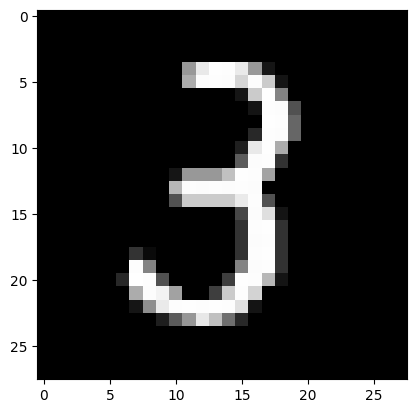

In [ ]:
random_nr = np.random.randint(0, 60000)
plt.imshow(X_train[random_nr], cmap="gray");

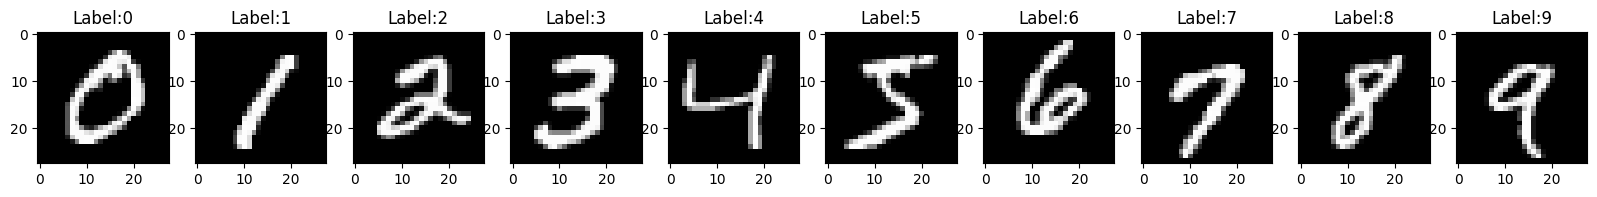

In [ ]:
num_classes = 10
fig, ax = plt.subplots(1, num_classes, figsize=(20,20))
for i in range(num_classes):
  sample = X_train[y_train == i][0]
  ax[i].imshow(sample, cmap="gray")
  ax[i].set_title(f"Label:{i}")

In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
model = Sequential()

model.add(Dense(units=128, input_shape=(784, ), activation="relu"))
model.add(Dense(units=128, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics="accuracy")
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
BATCH_SIZE = 512
epochs = 11
model.fit(x=X_train, y=y_train, batch_size = BATCH_SIZE, epochs = epochs )

Epoch 1/11
118/118 [==============================] - 3s 16ms/step - loss: 0.5853 - accuracy: 0.8314
Epoch 2/11
118/118 [==============================] - 2s 18ms/step - loss: 0.2228 - accuracy: 0.9352
Epoch 3/11
118/118 [==============================] - 3s 22ms/step - loss: 0.1644 - accuracy: 0.9523
Epoch 4/11
118/118 [==============================] - 2s 17ms/step - loss: 0.1299 - accuracy: 0.9617
Epoch 5/11
118/118 [==============================] - 3s 25ms/step - loss: 0.1085 - accuracy: 0.9679
Epoch 6/11
118/118 [==============================] - 3s 26ms/step - loss: 0.0918 - accuracy: 0.9725
Epoch 7/11
118/118 [==============================] - 3s 25ms/step - loss: 0.0788 - accuracy: 0.9764
Epoch 8/11
118/118 [==============================] - 4s 37ms/step - loss: 0.0705 - accuracy: 0.9788
Epoch 9/11
118/118 [==============================] - 3s 26ms/step - loss: 0.0615 - accuracy: 0.9821
Epoch 10/11
118/118 [==============================] - 4s 30ms/step - loss: 0.0532 - accura

In [ ]:
train_loss, train_acc = model.evaluate(X_train, y_train)
test_loss, test_acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0709 - accuracy: 0.9786


In [ ]:
print(f"Train Loss: {train_loss}, Train Accuracy: {train_acc}")
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

Train Loss: 0.03131650388240814, Train Accuracy: 0.9911166429519653
Test Loss: 0.07088759541511536, Test Accuracy: 0.978600025177002


In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 [==============================] - 1s 3ms/step


In [ ]:
random_num = np.random.choice(len(X_test))
X_sample = X_test[random_num]

y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_num]

y_sample_pred_class=y_pred_classes

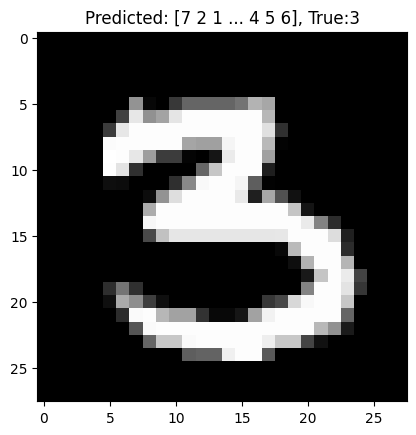

In [ ]:
plt.title(f"Predicted: {y_sample_pred_class}, True:{y_sample_true}")
plt.imshow(X_sample.reshape(28, 28), cmap="gray");

AttributeError: 'Axes' object has no attribute 'setfieldax'

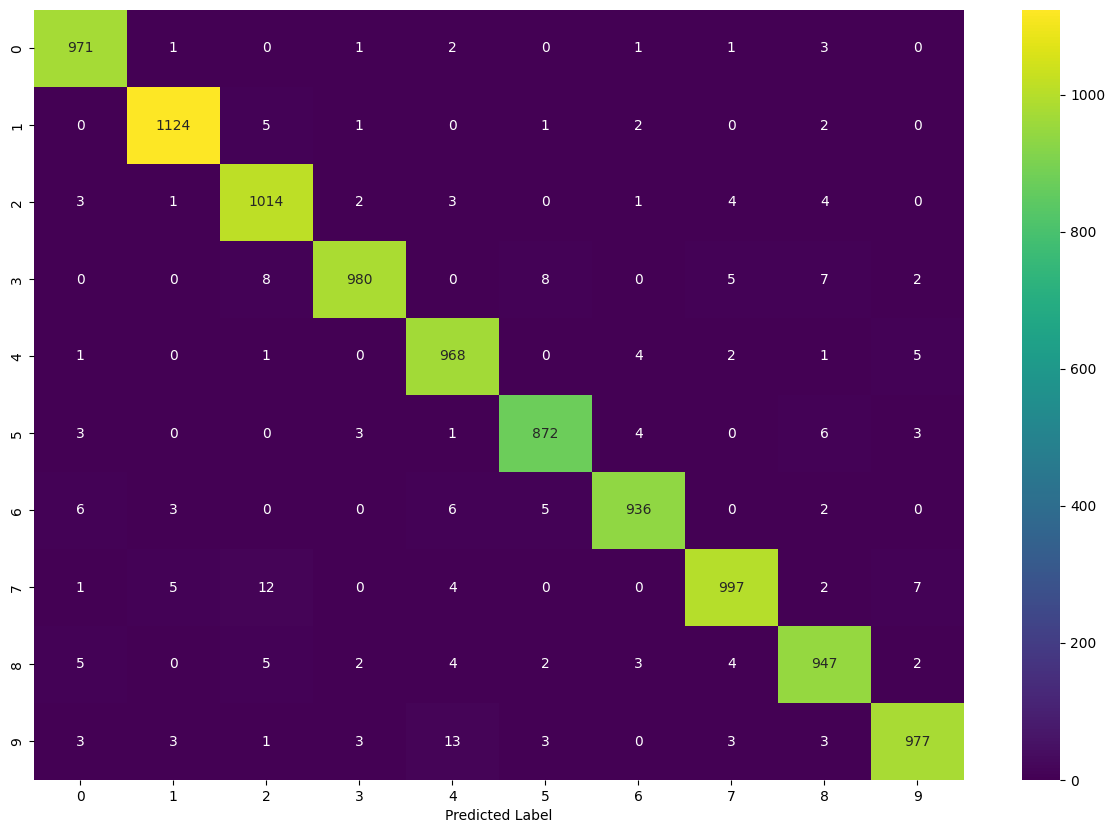

In [ ]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt="d", ax=ax, cmap="viridis")

ax.set_xlabel("Predicted Label")
ax.setfieldax.set_title("Confusion Matrix");